# Play Store Clusterization
https://www.kaggle.com/madhav000/playstore-analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA, NMF
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import VarianceThreshold, RFECV
from sklearn.svm import SVR
dataframe = pd.read_csv('googleplaystore.csv')
dataframe.head(5)

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [2]:
#only for numeric columns
dataframe.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


In [3]:
def value_counts_two(column):
    value = column.value_counts()
    label = column.value_counts().index
    return label, value

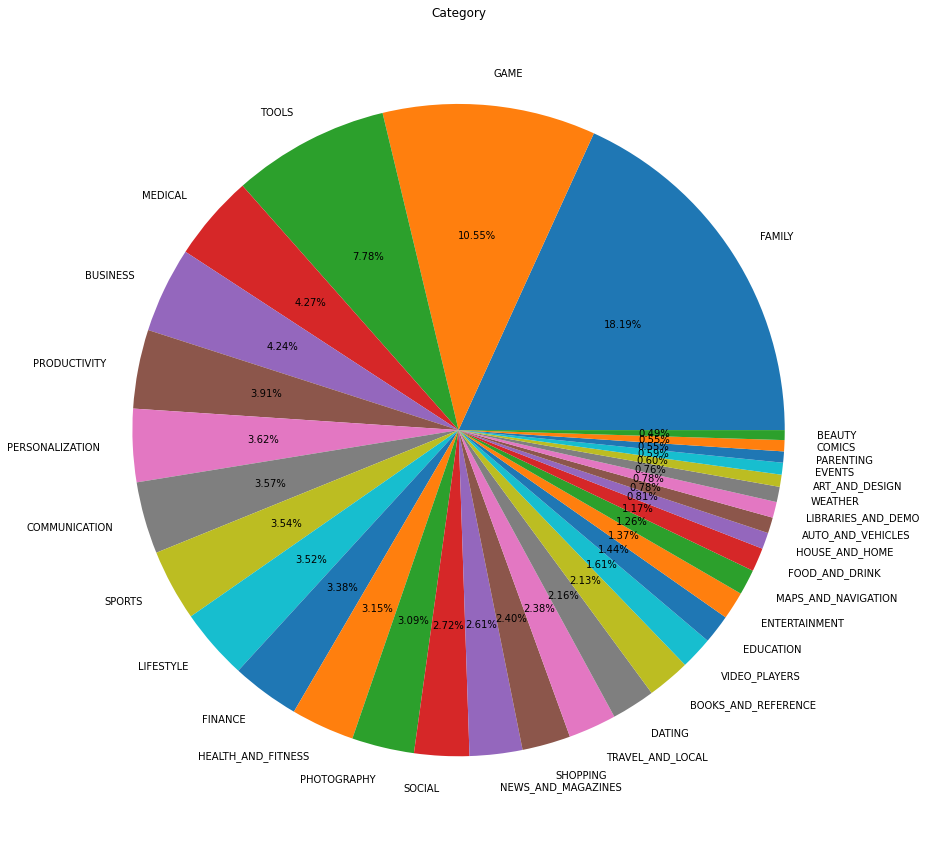

In [4]:
category_labels,category_value = value_counts_two(dataframe['Category'])
fig = plt.figure(figsize =(15, 15)) 
plt.pie(category_value, labels = category_labels, autopct='%1.2f%%')
plt.title('Category')
plt.show()

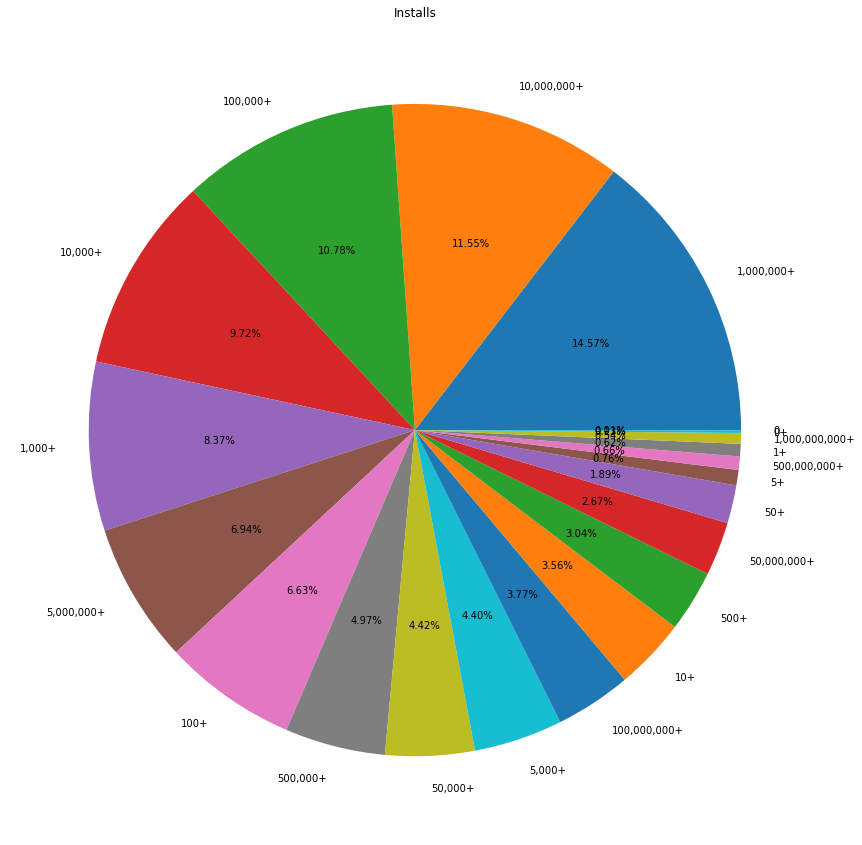

In [5]:
#print("Different values for the genres:\n ",dataframe['Genres'].value_counts())
category_labels,category_value = value_counts_two(dataframe['Installs'])
fig = plt.figure(figsize =(15, 15)) 
plt.pie(category_value, labels = category_labels, autopct='%1.2f%%')
plt.title('Installs')
plt.show()

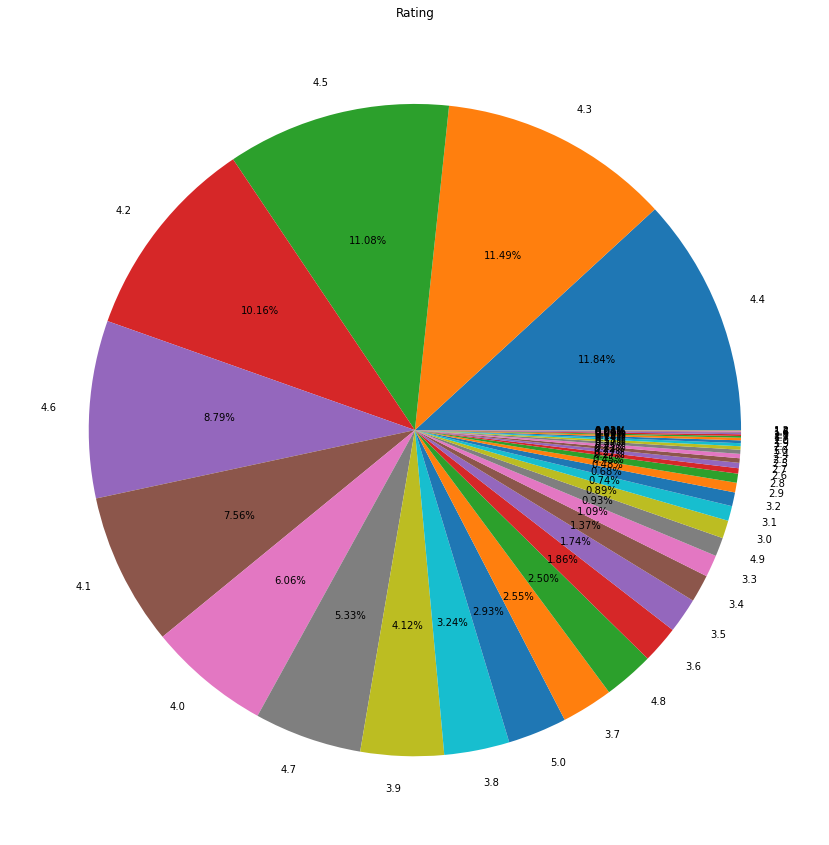

In [6]:
category_labels,category_value = value_counts_two(dataframe['Rating'])
fig = plt.figure(figsize =(15, 15)) 
plt.pie(category_value, labels = category_labels, autopct='%1.2f%%')
plt.title('Rating')
plt.show()

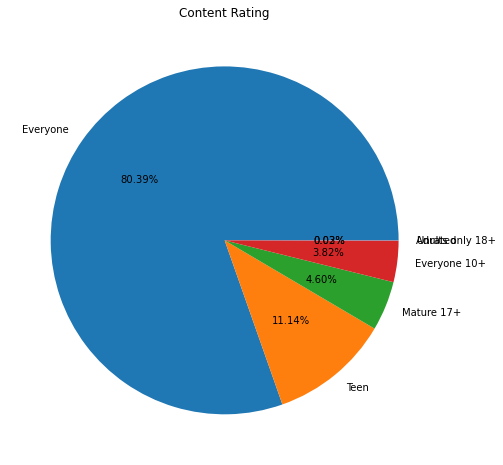

In [7]:
con_rating_labels,con_rating_value = value_counts_two(dataframe['Content Rating'])
fig = plt.figure(figsize =(8, 8)) 
plt.pie(con_rating_value, labels = con_rating_labels, autopct='%1.2f%%')
plt.title('Content Rating')
plt.show() 

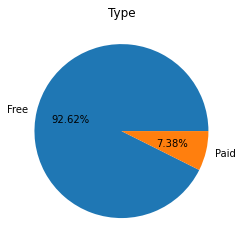

In [8]:
type_labels,type_value = value_counts_two(dataframe['Type'])
plt.pie(type_value, labels = type_labels, autopct='%1.2f%%')
plt.title('Type')
plt.show() 

In [9]:
#Brisanje kolona Type i Genres
dataframe.drop(['Type'], axis=1,inplace=True)
dataframe.drop(['Genres'], axis=1,inplace=True)

#Uklanjanje $ ispred cene
dataframe['Price'] = dataframe['Price'].replace('[\$,]', '', regex=True).astype(float)

#Uklanjanje + iza broja instalacija
dataframe['Installs'] = dataframe['Installs'].replace('[,\+]', '', regex=True).astype(int)

In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          9366 non-null   float64
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int32  
 6   Price           10840 non-null  float64
 7   Content Rating  10840 non-null  object 
 8   Last Updated    10840 non-null  object 
 9   Current Ver     10832 non-null  object 
 10  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(7)
memory usage: 889.3+ KB


In [11]:
dataframe.isnull().sum()

Rating            1474
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Content Rating       0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [12]:
#Brisanje redova koje sadrze Null vrednost
dataframe = dataframe.dropna()
start_df = dataframe.copy()

In [13]:
dataframe.count()

Rating            9360
App               9360
Category          9360
Reviews           9360
Size              9360
Installs          9360
Price             9360
Content Rating    9360
Last Updated      9360
Current Ver       9360
Android Ver       9360
dtype: int64

In [14]:
import numpy as np
from sklearn import preprocessing

#Rescaling function 0-1
def rescaling(dfColumn):
    # Create feature
    feature = dfColumn.to_numpy().reshape(-1, 1)
    #Create scaler
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    # Scale feature
    scaled_feature = minmax_scale.fit_transform(feature)
    return pd.Series(scaled_feature.reshape(-1), index=dataframe.index)


#F-ja vraca niz brojeva iz niza stringova
def strToNum(column, valueForVary):
    arr = []
    for r in column:
        value = 0
        if(r[0].isdigit()):
            s = str(int(''.join(filter(str.isdigit, r))))
            value = float(s[:1] + "." + s[1:])
        else:
            value = valueForVary
        arr.append(value)
    return pd.DataFrame(np.array(arr), index=dataframe.index)


def columnSize(column):
    arr = []
    count = 0
    sum = 0
    for r in column:
        value = 0
        n=len(r)
        if(r[n-1]=='k'): 
            value = float(r[:n-1])*0.001 #1KB = 0.001MB 
            sum += value
            count +=1
        elif r[n-1]=='M':
            value = float(r[:n-1]) 
            sum += value
            count += 1
        else:
            value = -10
        arr.append(value)
    return (pd.DataFrame(np.array(arr), index=dataframe.index), sum/count)

def toOrdinalDate(column):
    arr=[]
    for date in column:
        time=pd.Timestamp(date)
        time=time.toordinal()
        arr.append(time)
    return pd.DataFrame(np.array(arr), index=dataframe.index)

In [15]:
s = str(int(''.join(filter(str.isdigit,dataframe['Android Ver'].value_counts().index[0]))))
valueAndroid = float(s[:1]+ "."+s[1:])
s = str(int(''.join(filter(str.isdigit,dataframe['Current Ver'].value_counts().index[1]))))
valueCurrent = float(s[:1]+ "."+s[1:])

dataframe['Android Ver'] = strToNum(dataframe['Android Ver'].to_numpy(),valueAndroid)
dataframe['Current Ver'] = strToNum(dataframe['Current Ver'].to_numpy(),valueCurrent)
dataframe['Size'],mean = columnSize(dataframe['Size'].to_numpy())
dataframe['Size'] = dataframe['Size'].replace(-10, mean)
dataframe['Last Updated'] = toOrdinalDate(dataframe['Last Updated'].to_numpy())

#Rescaling
dataframe['Reviews'] = rescaling(dataframe['Reviews'])
dataframe['Rating'] = rescaling(dataframe['Rating'])
dataframe['Installs'] = rescaling(dataframe['Installs'])
dataframe['Price'] = rescaling(dataframe['Price'])
dataframe['Size'] = rescaling(dataframe['Size']) 
dataframe['Last Updated'] = rescaling(dataframe['Last Updated'])
dataframe['Android Ver']= rescaling(dataframe['Android Ver'])
dataframe['Current Ver'] = rescaling(dataframe['Current Ver'])

In [16]:
#Encoding Ordinal Categorical Features
cont_rating_mapper = {"Unrated":1, "Everyone":1, "Everyone 10+":2, "Teen":3, "Mature 17+":4, "Adults only 18+":5}
dataframe['Content Rating'] = dataframe['Content Rating'].replace(cont_rating_mapper)
#Rescaling
dataframe['Content Rating'] = rescaling(dataframe['Content Rating'])

category_mapper=dataframe['Category'].value_counts().to_dict()
dataframe['Category'] = dataframe['Category'].replace(category_mapper)
#Rescaling
dataframe['Category'] = rescaling(dataframe['Category'])

In [17]:
dataframe = dataframe.set_index(dataframe['App'])
dataframe.drop(['App'],axis=1,inplace=True)
dataframe.head()

,Rating,Category,Reviews,Size,Installs,Price,Content Rating,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,0.775,0.01115,0.000002,0.189931,0.00001,0.0,0.0,0.929024,0.000000,0.432857
Coloring book moana,0.725,0.01115,0.000012,0.139927,0.00050,0.0,0.0,0.931689,0.112183,0.432857
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",0.925,0.01115,0.001120,0.086922,0.00500,0.0,0.0,0.997667,0.026924,0.432857
Sketch - Draw & Paint,0.875,0.01115,0.002759,0.249936,0.05000,0.0,0.5,0.979673,0.000000,0.457143
Pixel Draw - Number Art Coloring Book,0.825,0.01115,0.000012,0.027917,0.00010,0.0,0.0,0.983672,0.011218,0.485714


In [18]:
#feature selection
#vraca koje feature bi trebalo da zadrzimo
def rfecvSelection(dataframe):
    estimator = SVR(kernel="linear")
    rfecv = RFECV(estimator=estimator, step=1,scoring="neg_mean_squared_error")
    y = dataframe['Rating']
    #dataframe.drop(['Rating'],axis=1,inplace=True)
    rfecv.fit(dataframe.iloc[:,1:].values,y)
    rfecv.transform(dataframe.iloc[:,1:].values)
    print(rfecv.n_features_)
    print(rfecv.support_)
    print(rfecv.ranking_)
    return rfecv.get_support(1)

In [19]:
toKeep = rfecvSelection(dataframe)
toKeep

5
[False  True False  True  True False  True False  True]
[4 1 5 1 1 3 1 2 1]


array([1, 3, 4, 6, 8], dtype=int64)

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

dataframe = dataframe.head(7000)
target = dataframe['Rating']
dataframe = dataframe.drop(['Rating'], axis=1)
x = dataframe.iloc[:,0:8].values

#reduced features
i = 0
j=0
dfReduced=pd.DataFrame()
while i<len(toKeep):
    dfReduced.insert(i,dataframe.columns[toKeep[i]],dataframe[dataframe.columns[toKeep[i]]])
    i+=1

dfReduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, Photo Editor & Candy Camera & Grid & ScrapBook to RadRevision: Anatomy on CT
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Reviews       7000 non-null   float64
 1   Installs      7000 non-null   float64
 2   Price         7000 non-null   float64
 3   Last Updated  7000 non-null   float64
 4   Android Ver   7000 non-null   float64
dtypes: float64(5)
memory usage: 328.1+ KB


In [21]:
from kneed import KneeLocator
def elbowMethod(x):
    score = []
    for cluster in range(1,11):
        kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
        kmeans.fit(x)
        score.append(kmeans.inertia_)

    # plotting the score
    plt.plot(range(1,11), score)
    plt.title('The Elbow Method')
    plt.xlabel('no of clusters')
    plt.ylabel('wcss')
    plt.show()
    return score

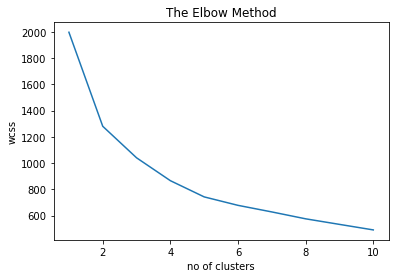

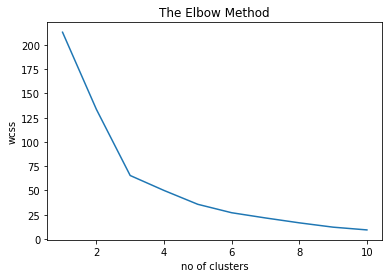

Number of clusters:  3


In [22]:
elbowMethod(x)
score = elbowMethod(dfReduced.iloc[:,0:4].values)

kn = KneeLocator(range(1,11), score, curve='convex', direction='decreasing')
PRED_NUM_CLUSTERS = kn.knee
print("Number of clusters: ", PRED_NUM_CLUSTERS)

In [23]:
import matplotlib.pyplot as plt
from itertools import cycle
def plotClustersDbscan(labels, X, core_sample_indices_):
# Black removed and is used for noise instead.
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[core_sample_indices_] = True
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
        # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % len(colors))
    plt.show()
    
def plotClustersMeanshift(labels, X, cluster_centers):
    plt.figure(1)
    plt.clf()
    n_clusters_ = len(np.unique(labels))
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        my_members = labels == k
        cluster_center = cluster_centers[k]
        plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
        plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

In [24]:
from mpl_toolkits.mplot3d import Axes3D
def silhouetteScore(x):
    #for n_clusters in range(2,11):
    n_clusters = PRED_NUM_CLUSTERS
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10, algorithm="full")
    cluster_labels = clusterer.fit_predict(x)

    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    f=0
    s=4
    t=2
        
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, f], x[:, s], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, f], centers[:, s], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')
    
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
                fontsize=14, fontweight='bold')
    plt.show()
    
    #### Plotting Axes3D ####
    fig = plt.figure(1, figsize=(7,7))
    ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
    ax.scatter(x[:, f], x[:, s], x[:, t], c=colors, edgecolor="k", s=50)
    #ax.set_xlabel("Xlabel")
    #ax.set_ylabel("Ylabel")
    #ax.set_zlabel("Zlabel")
    plt.show()

## KMeans

For n_clusters = 3 The average silhouette_score is : 0.401249520599867


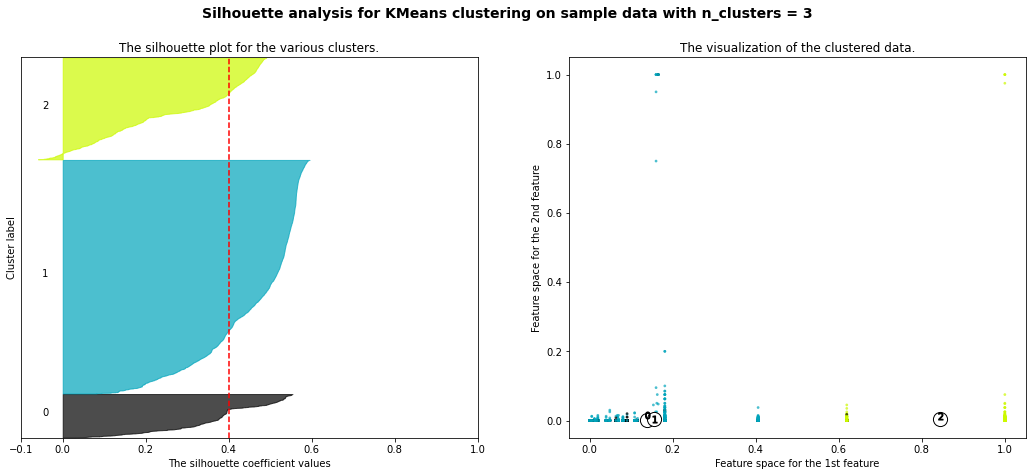

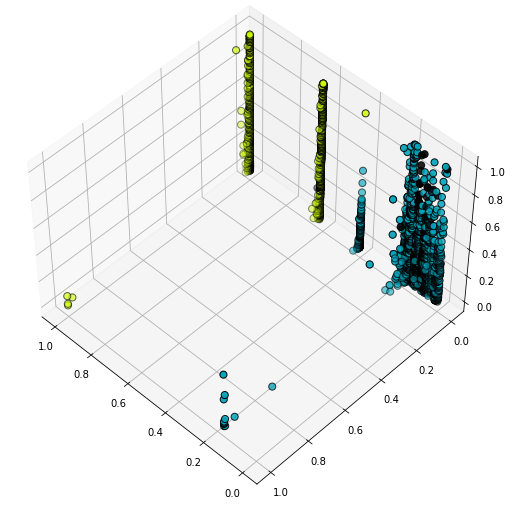

In [25]:
silhouetteScore(x)

For n_clusters = 3 The average silhouette_score is : 0.6594238683859674


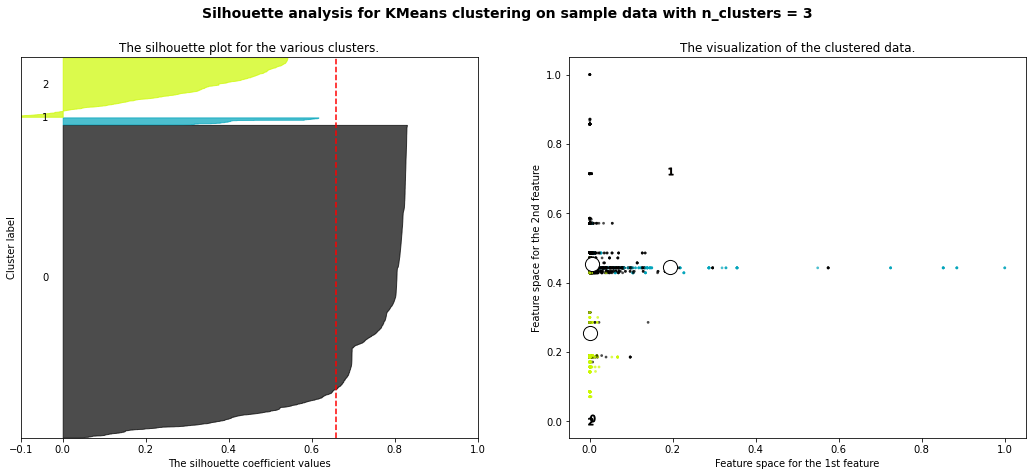

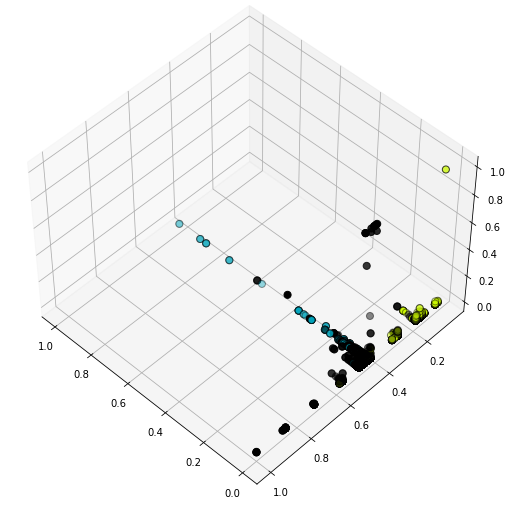

In [26]:
xReduced = dfReduced.values
silhouetteScore(xReduced)

In [27]:
clusterer = KMeans(n_clusters=PRED_NUM_CLUSTERS, random_state=10, algorithm="full")
cluster_labels = clusterer.fit_predict(xReduced)

n_clusters = len(set(cluster_labels))

df_clusters=[]
for i in range(n_clusters):
    df_clusters.append(pd.DataFrame())
    
for idx in range(len(cluster_labels)):
    df_clusters[cluster_labels[idx]] = df_clusters[cluster_labels[idx]].append(start_df.iloc[idx], ignore_index = True)

In [28]:
def my_info(column):
    value = column.value_counts().head(5).tolist()
    label = column.value_counts().head(5).index.tolist()
    return label, value

def two_charts(column, df_clus):
    c1_label,c1_value = my_info(df_clus[0][column])
    c2_label,c2_value = my_info(df_clus[1][column])

    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,3),constrained_layout=True)
    fig.suptitle(column)
    
    ax1.barh(c1_label,c1_value,align='center', color='r')
    ax1.set_title('Claster 1')
    ax2.barh(c2_label,c2_value,align='center', color='c')
    ax2.set_title('Claster 2')
    
    plt.show()

def three_charts(column, df_clus):
    c1_label,c1_value = my_info(df_clus[0][column])
    c2_label,c2_value = my_info(df_clus[1][column])
    c3_label,c3_value = my_info(df_clus[2][column])

    fig, (ax1,ax2, ax3) = plt.subplots(1, 3, figsize=(15,3),constrained_layout=True)
    fig.suptitle(column)
    ax1.barh(c1_label,c1_value,align='center', color='r')
    ax1.set_title('Cluster 1')
    ax2.barh(c2_label,c2_value,align='center', color='c')
    ax2.set_title('Cluster 2')
    ax3.barh(c3_label,c3_value,align='center')
    ax3.set_title('Cluster 3')
    
    plt.show()

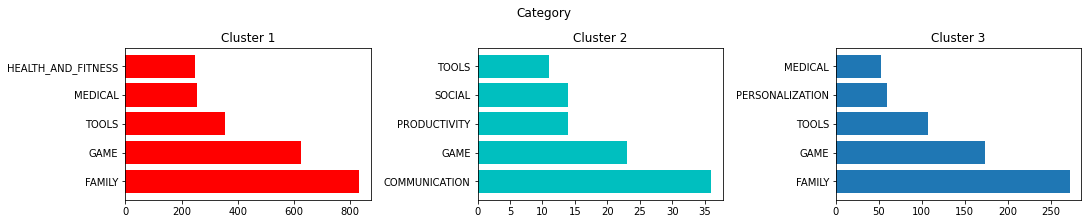

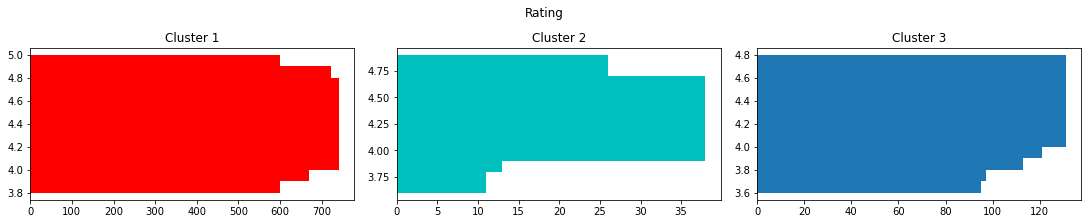

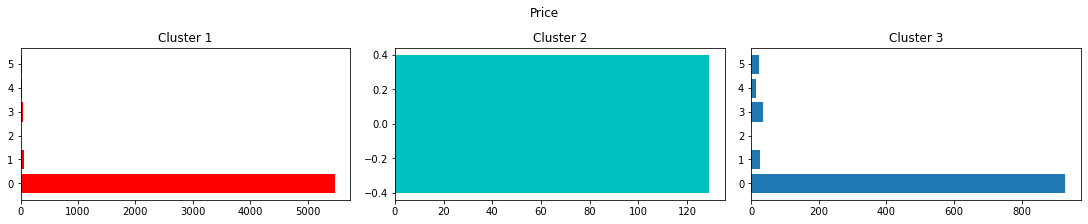

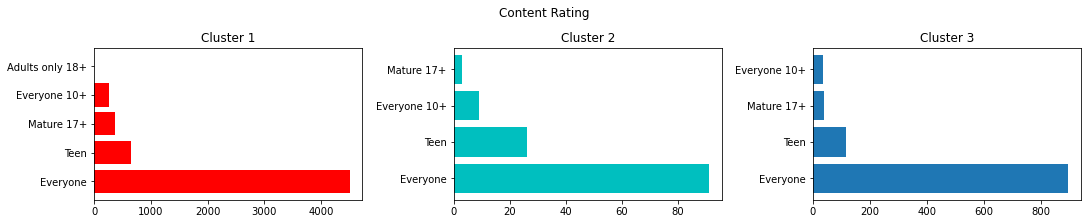

In [29]:
three_charts('Category',df_clusters)
three_charts('Rating',df_clusters)
three_charts('Price',df_clusters)
three_charts('Content Rating',df_clusters)

## DBscan

In [30]:
from sklearn.cluster import DBSCAN
def dbscan(x):
    cluster = DBSCAN(n_jobs=-1)
    model = cluster.fit_predict(x)
    silhouette_avg = silhouette_score(x, model)
    print("The average silhouette_score is :", silhouette_avg)
    model = cluster.fit(x)
    labels = model.labels_

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    plotClustersDbscan(labels, x, model.core_sample_indices_)
    
    return labels

The average silhouette_score is : 0.37459176014320666
Estimated number of clusters: 7
Estimated number of noise points: 6


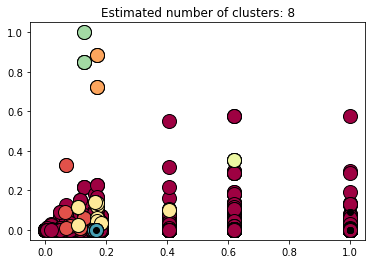

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
dbscan(x)

The average silhouette_score is : 0.8155059533296259
Estimated number of clusters: 3
Estimated number of noise points: 0


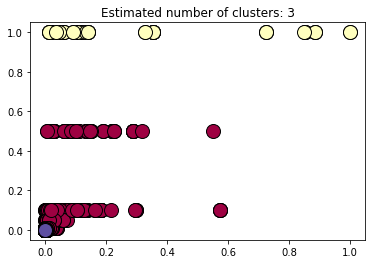

In [32]:
cluster_labels = dbscan(xReduced)
n_clusters = len(set(cluster_labels))

df_clusters=[]
for i in range(n_clusters):
    df_clusters.append(pd.DataFrame())
    
for idx in range(len(cluster_labels)):
    df_clusters[cluster_labels[idx]] = df_clusters[cluster_labels[idx]].append(start_df.iloc[idx], ignore_index = True)

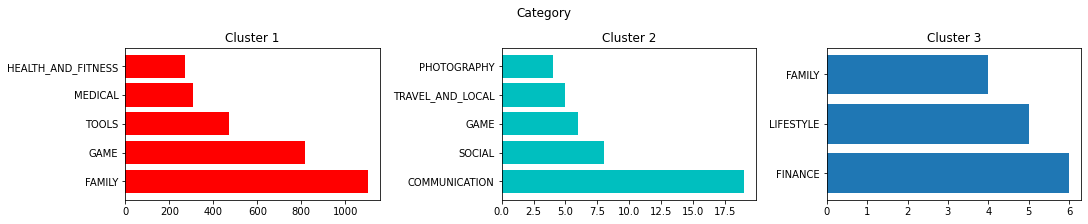

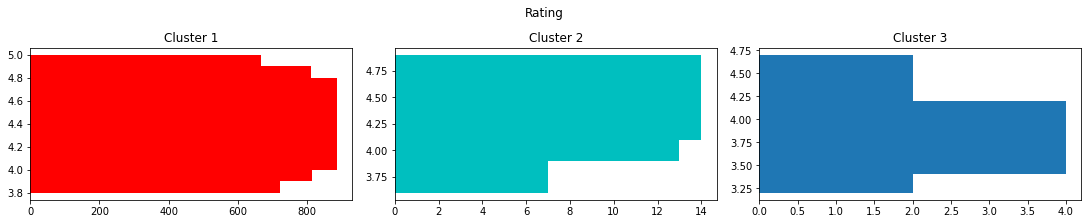

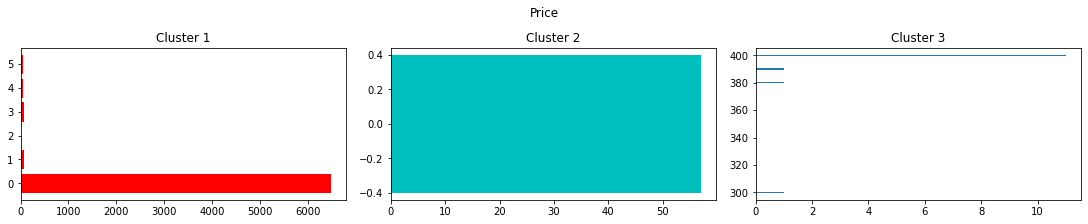

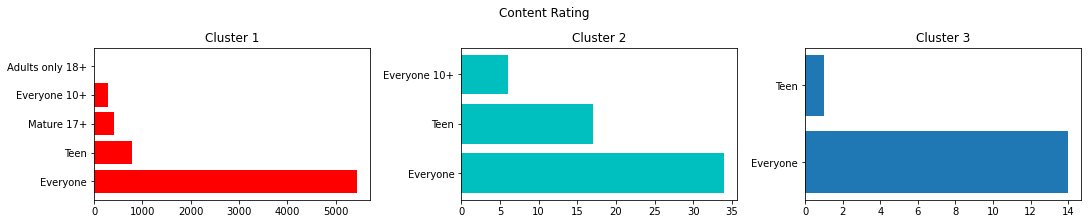

In [33]:
three_charts('Category',df_clusters)
three_charts('Rating',df_clusters)
three_charts('Price',df_clusters)
three_charts('Content Rating',df_clusters)

## Hierarchical Merging

In [34]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def hierarchicalMerging(x):
    #for n_clusters in range(2,11):
    n_clusters = PRED_NUM_CLUSTERS-1
    cluster = AgglomerativeClustering(n_clusters=n_clusters,linkage='average')
    model = cluster.fit_predict(x)
    silhouette_avg = silhouette_score(x, model)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
    model = cluster.fit(x)
    labels = model.labels_
    return labels

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

For n_clusters = 2 The average silhouette_score is : 0.531787182278514
For n_clusters = 2 The average silhouette_score is : 0.846900126879585


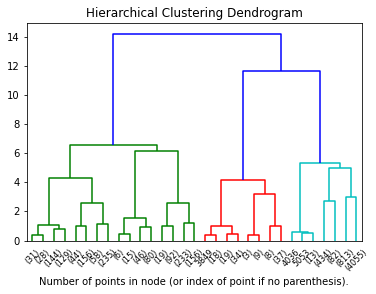

In [35]:
hierarchicalMerging(x)
cluster_labels = hierarchicalMerging(xReduced)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(xReduced)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [36]:
n_clusters = len(set(cluster_labels))
df_clusters=[]
for i in range(n_clusters):
    df_clusters.append(pd.DataFrame())
    
for idx in range(len(cluster_labels)):
    df_clusters[cluster_labels[idx]] = df_clusters[cluster_labels[idx]].append(start_df.iloc[idx], ignore_index = True)

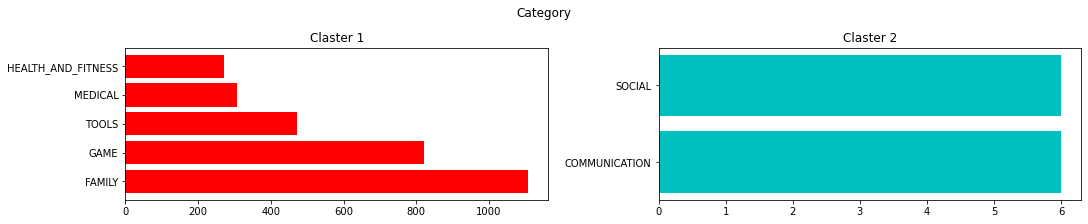

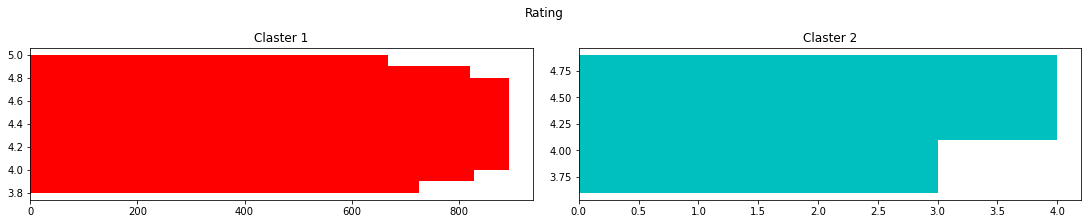

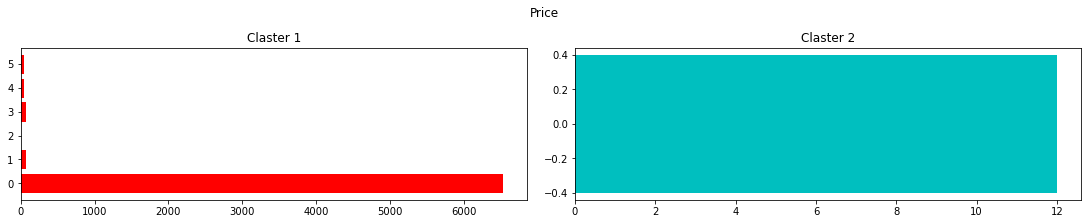

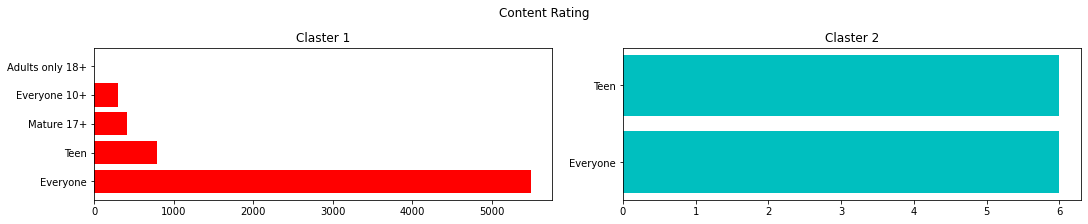

In [37]:
two_charts('Category',df_clusters)
two_charts('Rating',df_clusters)
two_charts('Price',df_clusters)
two_charts('Content Rating',df_clusters)